## Problem Statement:

   A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  
Points to Remember:
•	There are no null values in the dataset. 
•	There may be some customers with no loan history. 
•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  
Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/yn/Downloads/Micro-Credit-Project/Micro Credit Project/Data file.csv")

In [3]:
df.head(10)

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789   272.0   3055.050000   3065.150000   
1           2      1  76462I70374   712.0  12122.000000  12124.750000   
2           3      1  17943I70372   535.0   1398.000000   1398.000000   
3           4      1  55773I70781   241.0     21.228000     21.228000   
4           5      1  03813I82730   947.0    150.619333    150.619333   
5           6      1  35819I70783   568.0   2257.362667   2261.460000   
6           7      1  96759I84459   545.0   2876.641667   2883.970000   
7           8      1  09832I90846   768.0  12905.000000  17804.150000   
8           9      1  59772I84450  1191.0     90.695000     90.695000   
9          10      1  56331I70783   536.0     29.357333     29.357333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   
5    368.13    380.13                2.0                0.0  ...   
6    335.75    402.90               13.0                0.0  ...   
7    900.35   2549.11                4.0               55.0  ...   
8   2287.50   2287.50                1.0                0.0  ...   
9    612.96    612.96               11.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   
5              6.0                 0.0          3.0            18   
6              6.0                 0.0          1.0             6   
7              6.0                 0.0          7.0            42   
8              6.0                 0.0          4.0            24   
9              6.0                 0.0          1.0             6   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   
5                6                 0.0  11.000000   8.333333      UPW   
6                6                 0.0   0.000000   0.000000      UPW   
7                6                 0.0   6.000000   3.857143      UPW   
8                6                 0.0   2.666667   2.666667      UPW   
9                6                 0.0   0.000000   0.000000      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  
5  2016-07-02  
6  2016-07-05  
7  2016-08-05  
8  2016-06-15  
9  2016-06-08  

[10 rows x 37 columns]

In [4]:
df.shape

(209593, 37)

In [5]:
df.tail(10)

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
209583      209584      1  30201I82732   935.0     15.550667     15.550667   
209584      209585      0  70387I89237   945.0      0.000000      0.000000   
209585      209586      1  12227I90843   793.0   5350.315333   5356.210000   
209586      209587      1  60331I70370   254.0  20079.157333  20228.090000   
209587      209588      1  19900I95200   239.0  14678.000000  14704.900000   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
209583    140.44    140.44                4.0                0.0  ...   
209584     78.30     78.30                0.0                0.0  ...   
209585    594.80    640.20                2.0                0.0  ...   
209586   4003.12   5173.74                2.0                0.0  ...   
209587  12935.26  16775.60                8.0                0.0  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
209583              6.0                 0.0          1.0             6   
209584              6.0                 0.0          1.0             6   
209585              6.0                 0.0          5.0            30   
209586             12.0                 0.0         15.0           120   
209587             12.0                 1.0          3.0            24   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
209583                6                 0.0        0.0   0.000000      UPW   
209584                6                 0.0        0.0   0.000000      UPW   
209585                6                 0.0        5.2   5.200000      UPW   
209586               12                 0.0        3.0   2.400000      UPW   
209587               12                 1.0        0.0  30.000000      UPW   
209588                6                 0.0        1.0   1.000000      UPW   
209589                6                 0.0        1.0   1.000000      UPW   
209590               12                 0.0        4.0   3.833333      UPW   
209591               12                 0.0        0.0  10.500000      UPW   
209592               12                 0.0        0.0   0.000000      UPW   

             pdate  
209583  2016-06-02  
209584  2016-06-06  
209585  2016-07-04  
209586  2016-07-22  
209587  2016-08-02  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[10 rows x 37 columns]

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [9]:
df.isna().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

## Exploratory Data Analysis

In [10]:
df.iloc[:,0:15].describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  
count         209593.000000         209593.000000  
mean            1812.817952           3851.927942  
std             2070.864620          54006.374433  
min                0.000000           -200.000000  
25%              770.000000             11.000000  
50%             1539.000000             33.900000  
75%             1924.000000             83.000000  
max            55000.000000         999479.419319

In [11]:
df.iloc[:,15:].describe()

cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count   209593.00000  209593.000000      209593.000000         209593.000000   
mean         6.31543       7.716780       12396.218352           1864.595821   
std          7.19347      12.590251       16857.793882           2081.680664   
min          0.00000       0.000000           0.000000              0.000000   
25%          2.00000       0.000000        2317.000000            773.000000   
50%          4.00000       2.000000        7226.000000           1539.000000   
75%          8.00000       8.000000       16000.000000           1924.000000   
max        336.00000      88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    209593.000000   
mean        0.045712       2.758981      17.952021       274.658747   
std         0.951386       2.554502      17.379741      4245.264648   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       1.000000       6.000000         6.000000   
50%         0.000000       2.000000      12.000000         6.000000   
75%         0.000000       4.000000      24.000000         6.000000   
max        64.000000      50.000000     306.000000     99864.560864   

       medianamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count       209593.000000  209593.000000  209593.000000    209593.000000   
mean             0.054029      18.520919      23.645398         6.703134   
std              0.218039     224.797423      26.469861         2.103864   
min              0.000000       0.000000       0.000000         0.000000   
25%              0.000000       1.000000       6.000000         6.000000   
50%              0.000000       2.000000      12.000000         6.000000   
75%              0.000000       5.000000      30.000000         6.000000   
max              3.000000    4997.517944     438.000000        12.000000   

       medianamnt_loans90      payback30      payback90  
count       209593.000000  209593.000000  209593.000000  
mean             0.046077       3.398826       4.321485  
std              0.200692       8.813729      10.308108  
min              0.000000       0.000000       0.000000  
25%              0.000000       0.000000       0.000000  
50%              0.000000       0.000000       1.666667  
75%              0.000000       3.750000       4.500000  
max              3.000000     171.500000     171.500000

Observations:
1. We have 3 object type data and remaining are continous data.
2. There are no missing values in the data set.
3. Standard deviation is higher than mean value for many features. It shows that our data is heavily skewed.
4. As it is mentioned that, our data is very expensive, we will try to fill the outliers with some of the suitable value for the features where it is possible.

In [12]:
non_numeric_features=[]
numeric_features=[]
for col in df.columns:
    if df[col].dtype=='object':
        non_numeric_features.append(col)
    else:
        numeric_features.append(col)
    

In [13]:
for col in non_numeric_features:
    print(col)
    print("=================")
    print(df[col].value_counts(),'\n')

msisdn
04581I85330    7
47819I90840    7
71742I90843    6
87592I84456    6
55809I89238    6
              ..
82816I82732    1
13826I90846    1
17115I70372    1
93736I85330    1
20297I88659    1
Name: msisdn, Length: 186243, dtype: int64 

pcircle
UPW    209593
Name: pcircle, dtype: int64 

pdate
2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64 



Observations:
   1. msisdn is the mobile number of the customer. It is the unique number and it is not going to help us to find any trend on predicting the target value.So we will drop the feature 'msisdn'.
   2. pcircle is the telecom circle and there is only one value for all the records. So the relationship between this feature and the target variable will be same for all the records. So it is not going to give us any trend. So we will drop this feature 'pcircle'.
   3. We will convert the feature pdate into day, month and year and then will drop the feature 'pdate'.

In [14]:
df.drop(['msisdn','pcircle'],axis=1,inplace=True)

In [15]:
df['conv_date']=pd.to_datetime(df['pdate']).dt.day
df['conv_month']=pd.to_datetime(df['pdate']).dt.month
df['conv_year']=pd.to_datetime(df['pdate']).dt.year

In [16]:
df.drop(['pdate'],axis=1,inplace=True)

In [17]:
df['conv_year'].value_counts()

2016    209593
Name: conv_year, dtype: int64

Since all the records are from the same year 2016, lets drop this feature.

In [18]:
df.drop(['conv_year'],axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [20]:
df['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
94122.633158         1
59668.008360         1
                 ...  
66749.081149         1
55723.858041         1
31545.936341         1
66847.875001         1
96775.751803         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

In [21]:
df['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

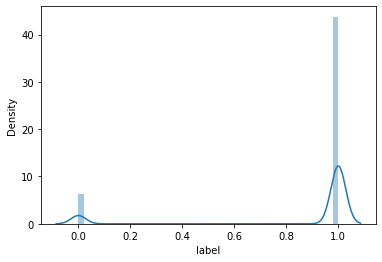

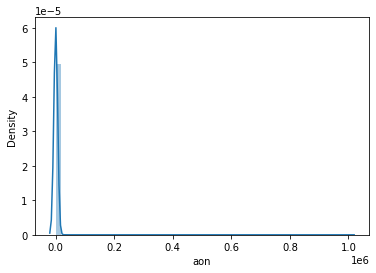

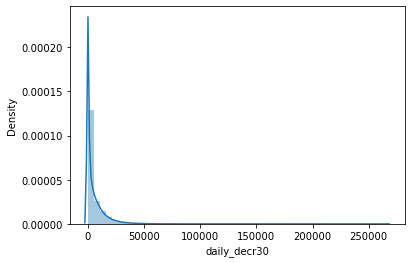

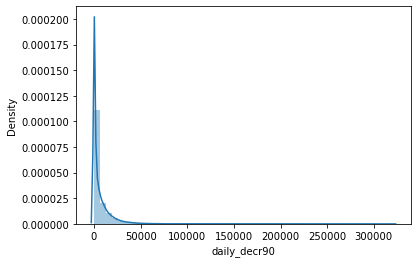

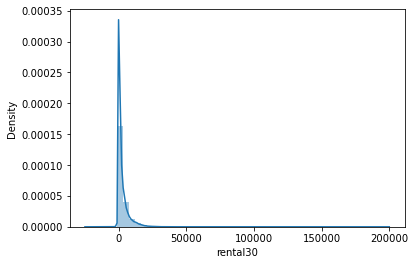

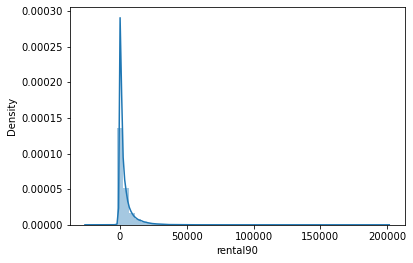

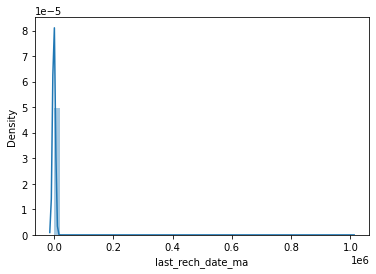

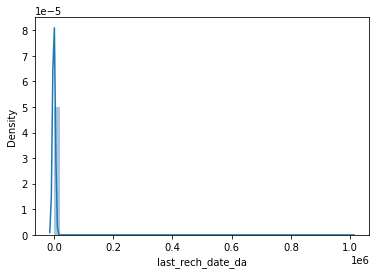

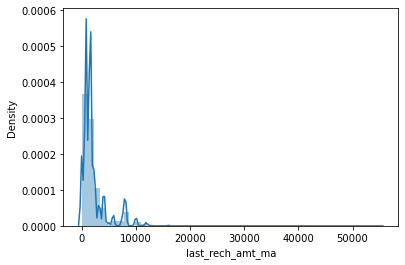

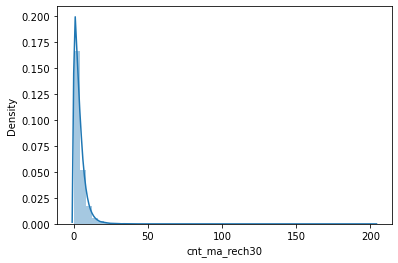

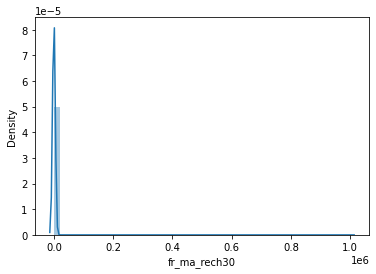

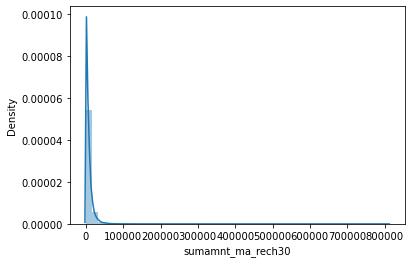

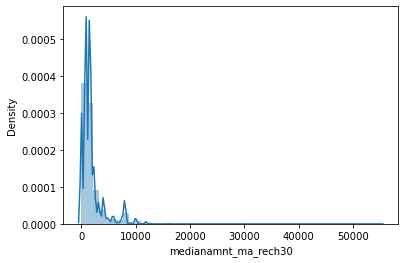

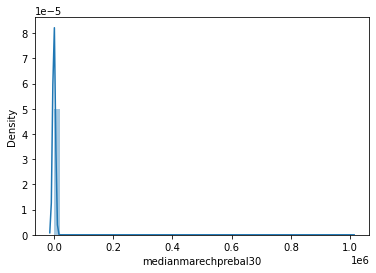

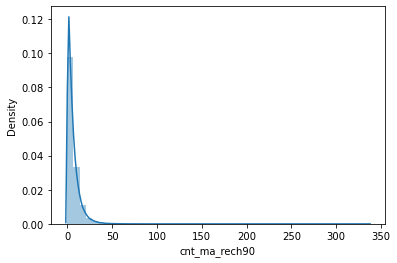

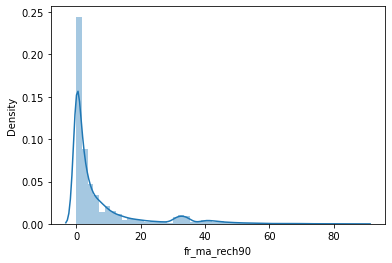

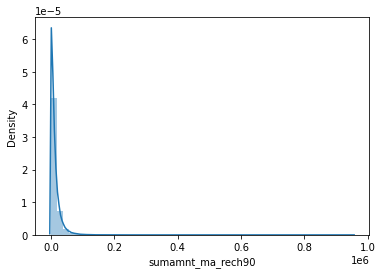

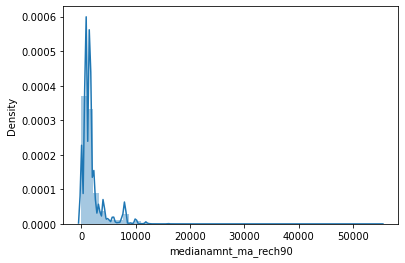

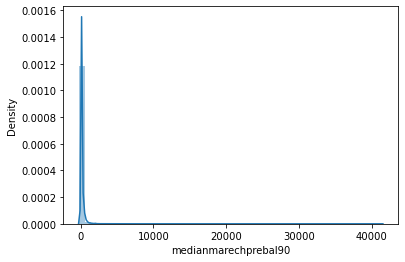

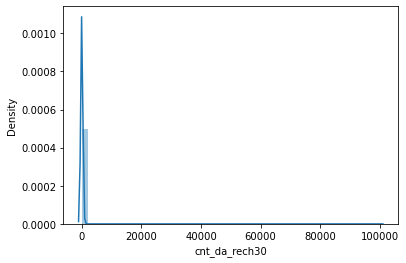

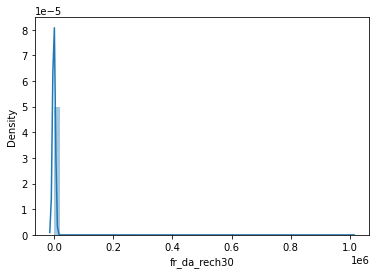

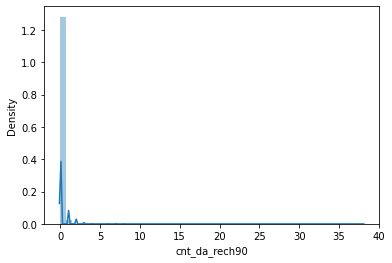

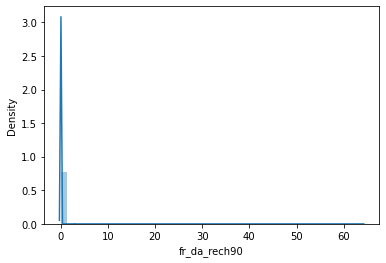

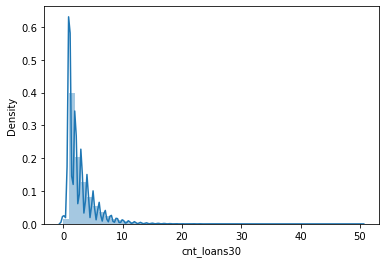

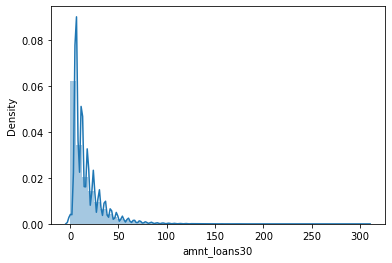

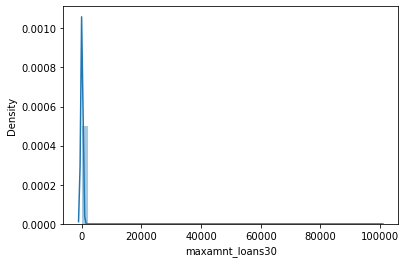

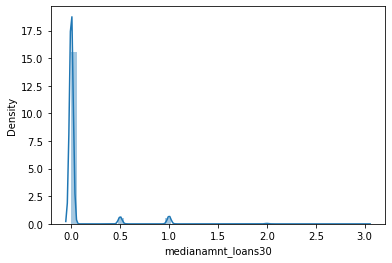

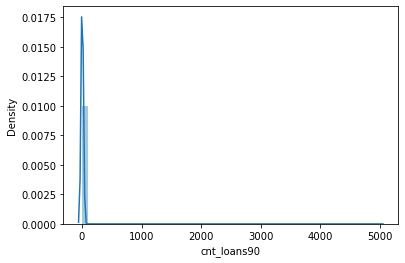

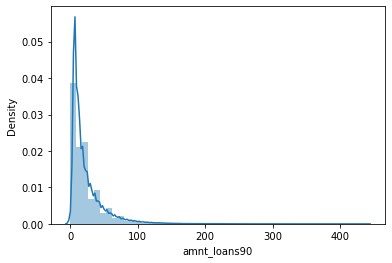

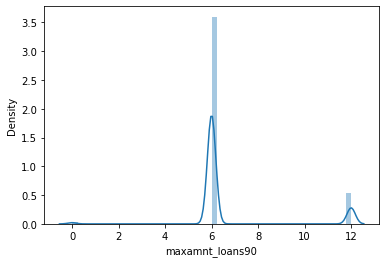

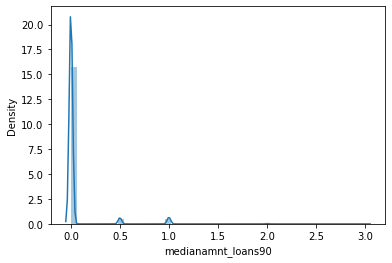

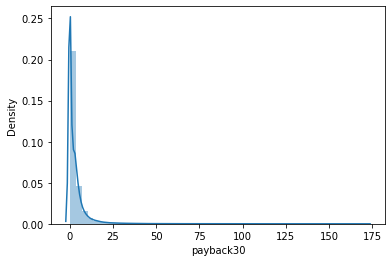

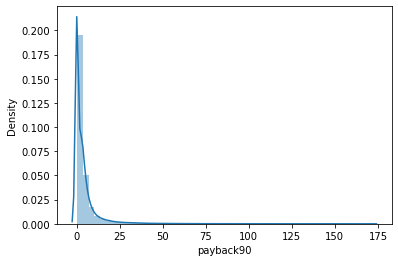

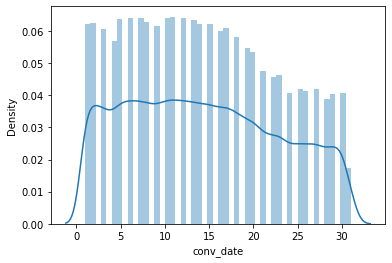

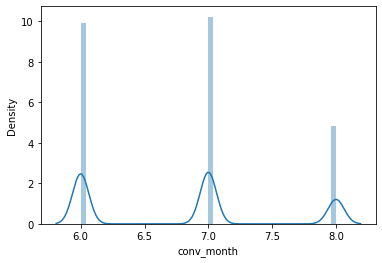

In [22]:
for col in df.columns:
    sns.distplot(df[col])
    plt.show()

1. Almost all the features are heavily right skewed.

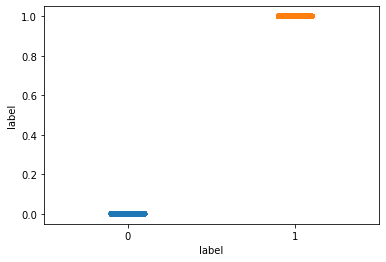

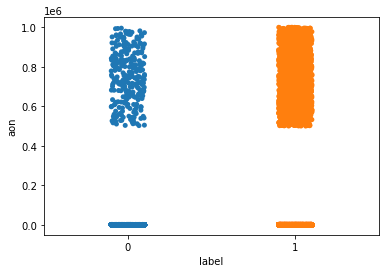

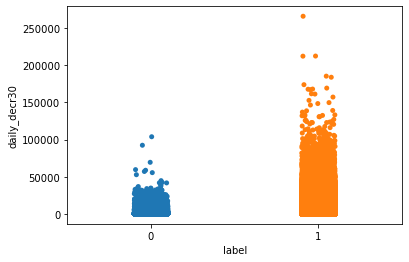

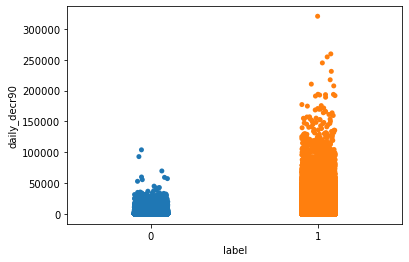

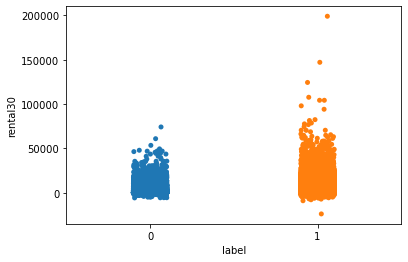

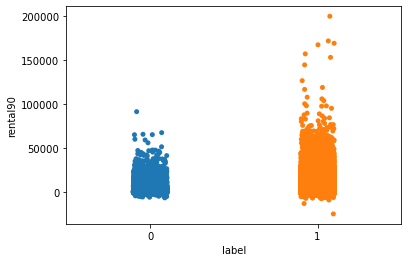

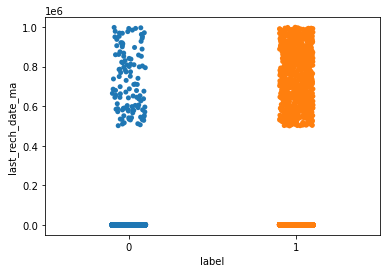

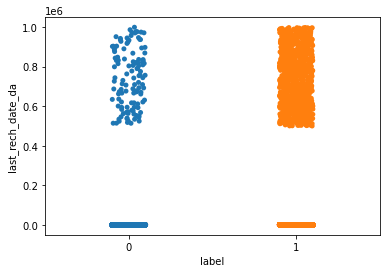

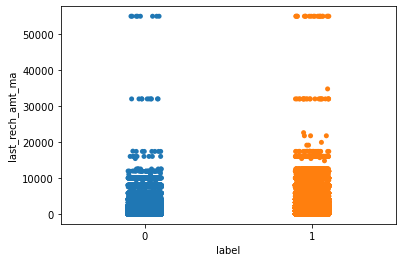

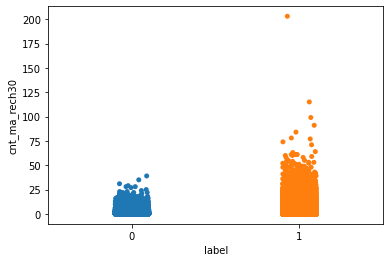

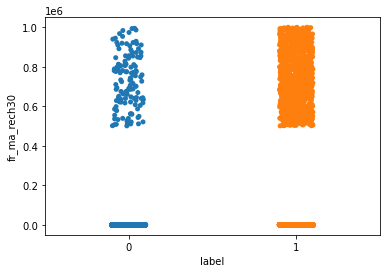

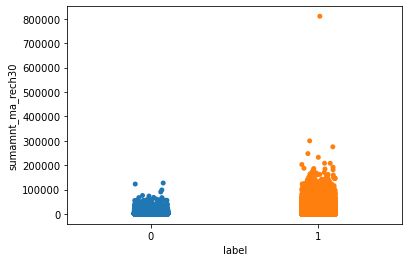

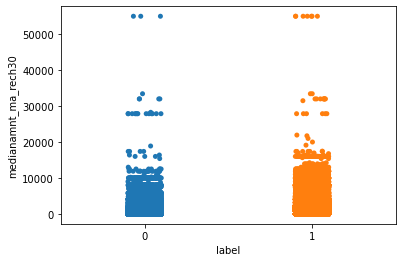

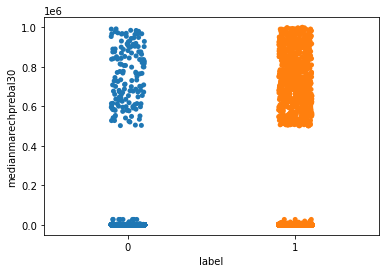

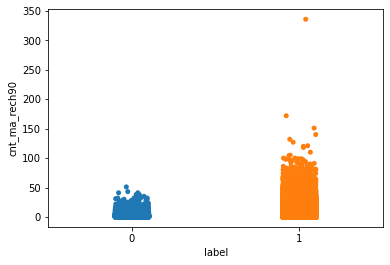

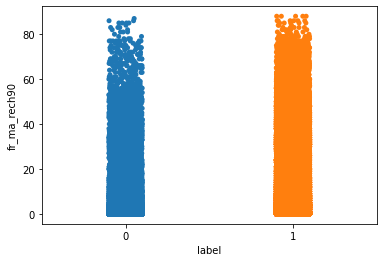

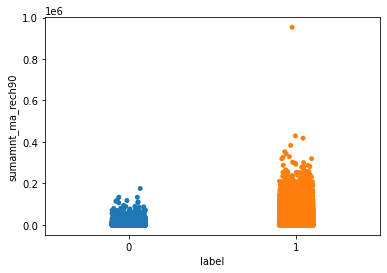

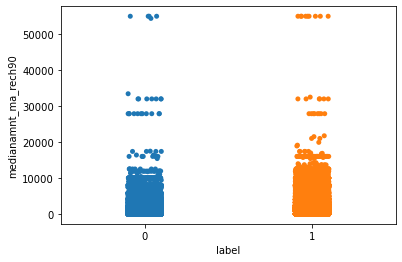

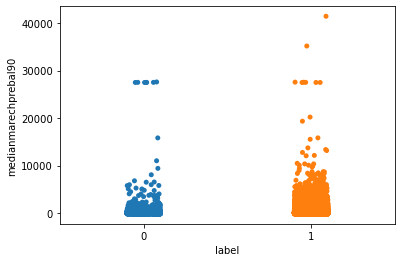

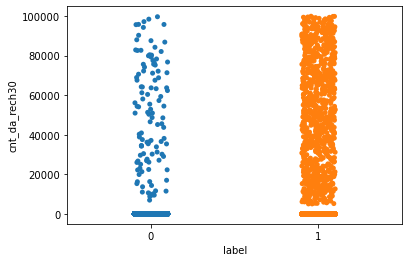

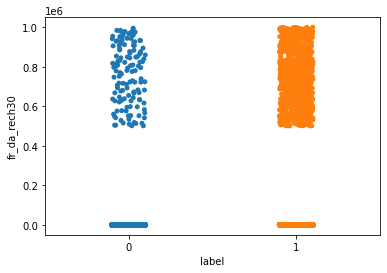

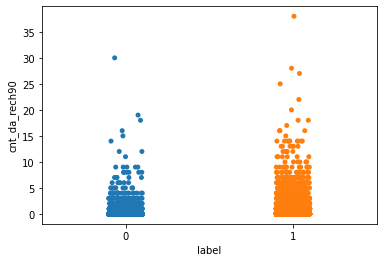

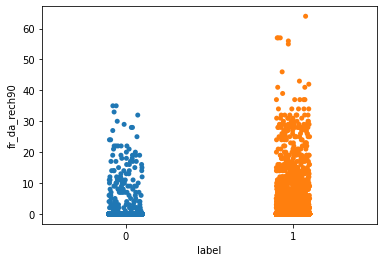

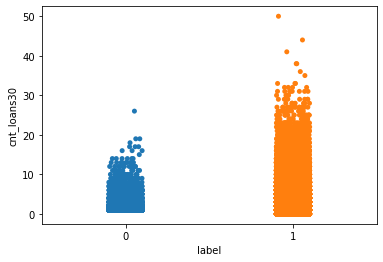

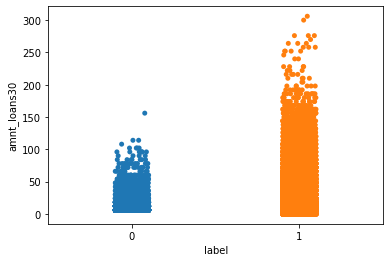

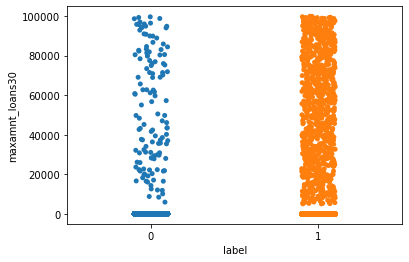

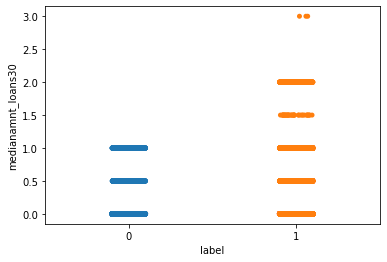

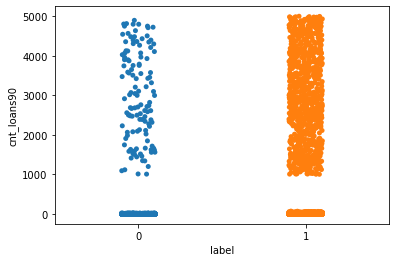

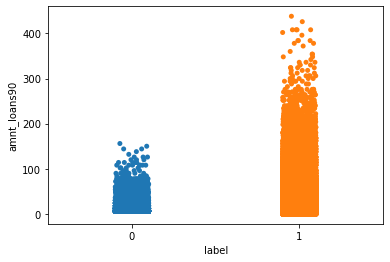

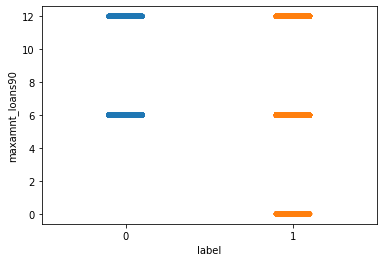

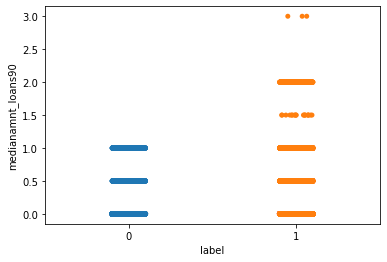

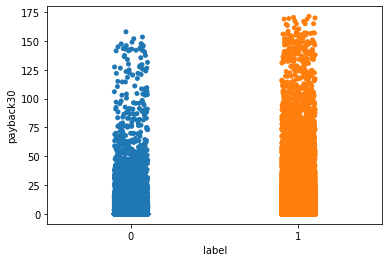

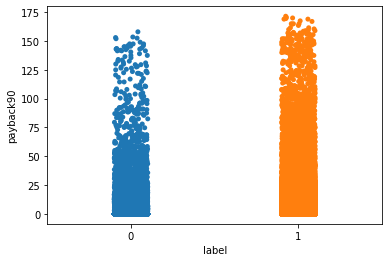

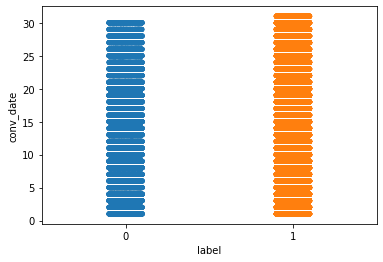

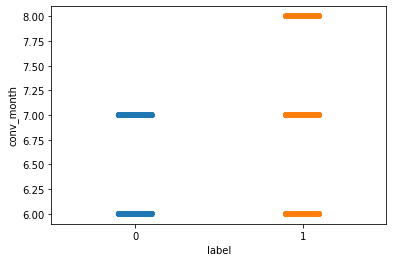

In [23]:
for col in df.columns:
    sns.stripplot(df['label'],df[col])
    plt.show()

Observations:
1. Daily amount spent from main account, averaged over last 30 days and last 90 days are less for defaulters(who are not paying loans back within 5 days).
2. Average main account balance over last 30 days and last 90 days are compartively less for deafulters.
3. Number of times main account got recharged in last 30 day and last 90 days are less for defaulters.
4. Total amount of recharge in main account over last 30 days and last 90 days are less for defaulters.
5. Total amount of loans taken by user in last 30 days and last 90 days are less for defaulters.

From the above obeservations its clear that data with respect to 30 days and data with respect to 90 days are almost having the similar kind of relation with the target variable. So, as per my understanding we can keep either of the time period data and i would prefer 90 days as it has more time span and it will be better to understand about customer's info with long time span.

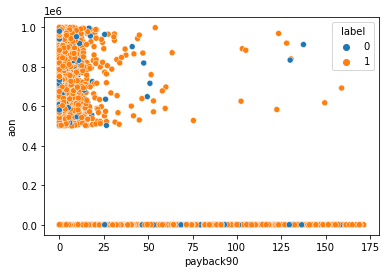

In [24]:
sns.scatterplot(x='payback90',y='aon',hue='label',data=df)
plt.show()

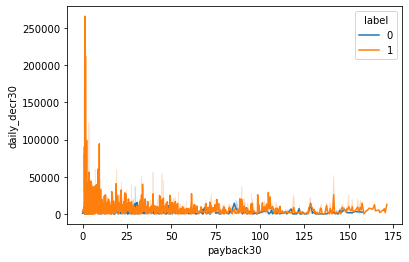

In [25]:
sns.lineplot(x='payback30',y='daily_decr30',hue='label',data=df)
plt.show()

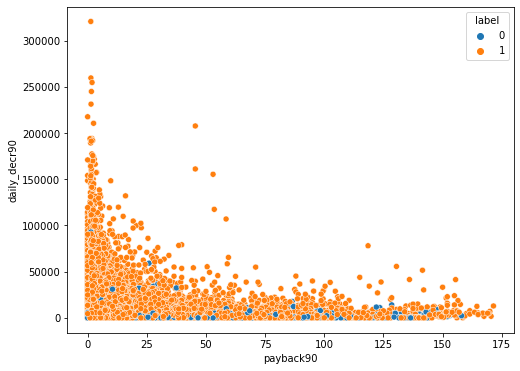

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='payback90',y='daily_decr90',hue='label',data=df)
plt.show()

1. The customers who are spending more amount from their main account on daily basis are most likely to payback the loans within the time period.

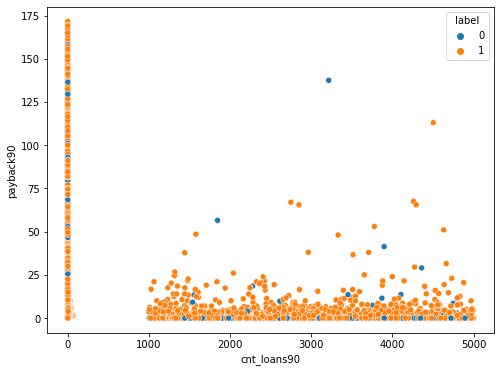

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='cnt_loans90',y='payback90',hue='label',data=df)
plt.show()

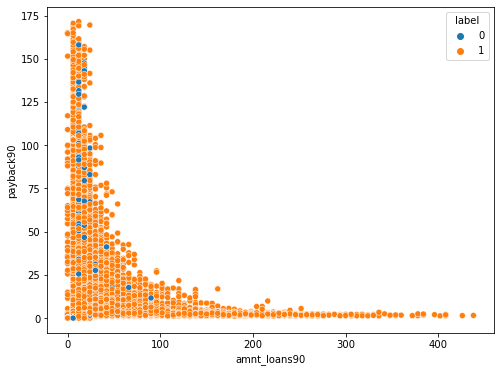

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='amnt_loans90',y='payback90',hue='label',data=df)
plt.show()

1. The customers who are taking more loan amount are paying back with less time period. 

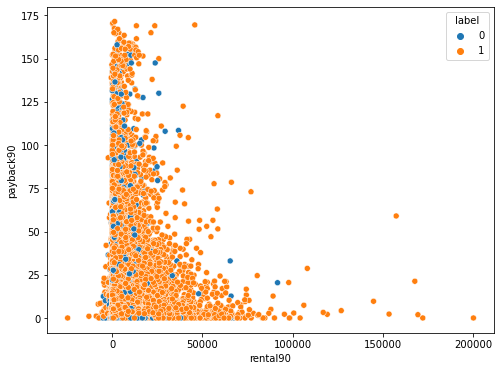

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='rental90',y='payback90',hue='label',data=df)
plt.show()

1. The customers who are maintaining less average main account balance are most like to be defaulters. 

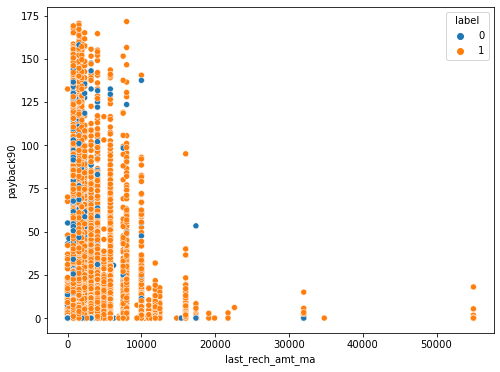

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='last_rech_amt_ma',y='payback90',hue='label',data=df)
plt.show()

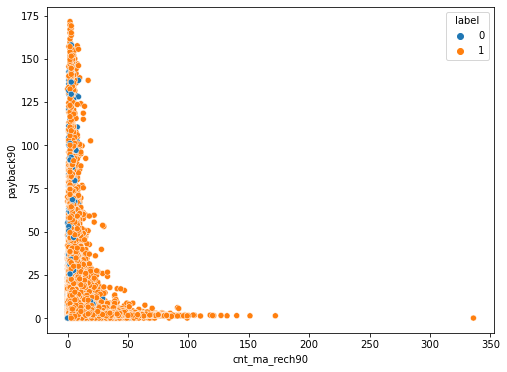

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='cnt_ma_rech90',y='payback90',hue='label',data=df)
plt.show()

1. When the customer recharging more number of times for their main account, they are most likely to payback the loans within the time period.

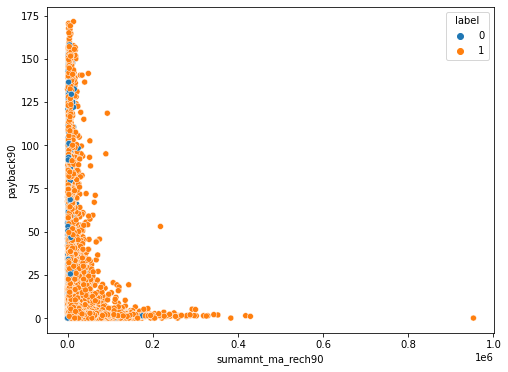

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sumamnt_ma_rech90',y='payback90',hue='label',data=df)
plt.show()

1. When the total amount of recharge in main account is more, the customer is more likely to payback the loans within the time period.


<Figure size 576x432 with 0 Axes>

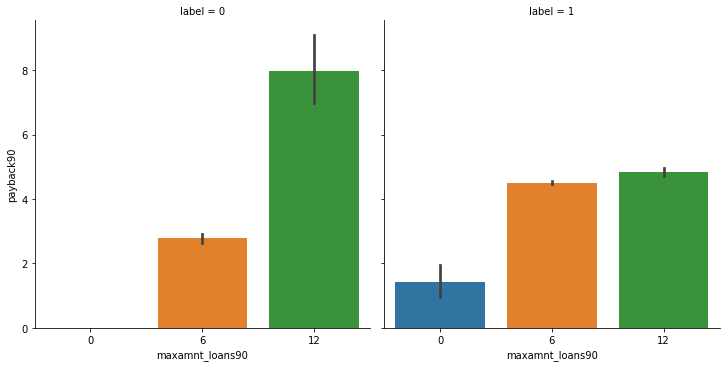

In [33]:
plt.figure(figsize=(8,6))
sns.catplot(x='maxamnt_loans90',y='payback90',col='label',kind='bar',data=df)
plt.show()

1. The customers who are taking loan amount of 12 are most likely to be defaulters.

<Figure size 576x432 with 0 Axes>

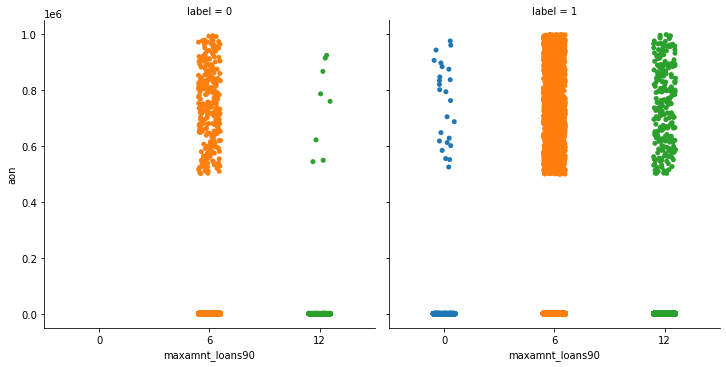

In [34]:
plt.figure(figsize=(8,6))
sns.catplot(x='maxamnt_loans90',y='aon',col='label',kind='strip',data=df,)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.catplot(x='payback90',y='aon',col='label',kind='bar',data=df)
plt.show()

In [35]:
new_df=df.copy()
new_df.drop(['cnt_loans30','amnt_loans30','cnt_ma_rech30','medianamnt_ma_rech30','daily_decr30','rental30','medianamnt_loans30','sumamnt_ma_rech30','payback30','fr_ma_rech30','fr_da_rech30','medianmarechprebal30','maxamnt_loans30','cnt_da_rech30'],axis=1,inplace=True)

#### Now let's focus highly skewed features and will try to handle them.

In [36]:
pd.set_option('display.max_columns',None)

In [37]:
new_df.describe()

label            aon   daily_decr90       rental90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    6082.515068    3483.406534   
std         0.330519   75696.082531   10918.812767    5770.461279   
min         0.000000     -48.000000     -93.012667  -24720.580000   
25%         1.000000     246.000000      42.692000     300.260000   
50%         1.000000     527.000000    1500.000000    1334.000000   
75%         1.000000     982.000000    7802.790000    4201.790000   
max         1.000000  999860.755168  320630.000000  200148.110000   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech90  \
count      209593.000000      209593.000000     209593.000000   209593.00000   
mean         3755.847800        3712.202921       2064.452797        6.31543   
std         53905.892230       53374.833430       2370.786034        7.19347   
min           -29.000000         -29.000000          0.000000        0.00000   
25%             1.000000           0.000000        770.000000        2.00000   
50%             3.000000           0.000000       1539.000000        4.00000   
75%             7.000000           0.000000       2309.000000        8.00000   
max        998650.377733      999171.809410      55000.000000      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech90   fr_da_rech90    cnt_loans90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541       0.041495       0.045712      18.520919   
std              369.215658       0.397556       0.951386     224.797423   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       1.000000   
50%               36.000000       0.000000       0.000000       2.000000   
75%               79.310000       0.000000       0.000000       5.000000   
max            41456.500000      38.000000      64.000000    4997.517944   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90      payback90  \
count  209593.000000    209593.000000       209593.000000  209593.000000   
mean       23.645398         6.703134            0.046077       4.321485   
std        26.469861         2.103864            0.200692      10.308108   
min         0.000000         0.000000            0.000000       0.000000   
25%         6.000000         6.000000            0.000000       0.000000   
50%        12.000000         6.000000            0.000000       1.666667   
75%        30.000000         6.000000            0.000000       4.500000   
max       438.000000        12.000000            3.000000     171.500000   

          conv_date     conv_month  
count  209593.00000  209593.000000  
mean       14.39894       6.797321  
std         8.43890       0.741435  
min         1.00000       6.000000  
25%         7.00000       6.000000  
50%        14.00000       7.000000  
75%        21.00000       7.000000  
max        31.00000       8.000000

           We could see the features which are with respect to number of days such as aon,last_rech_date_ma,last_rech_date_da are having negavtive values. We cannot expect number of days in negative values. Hence we will drop these data with negative values for the features with respect to no.of days.

In [38]:
(new_df >= 0).all()

label                    True
aon                     False
daily_decr90            False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech90            True
fr_ma_rech90             True
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
payback90                True
conv_date                True
conv_month               True
dtype: bool

In [39]:
new_df.loc[new_df['aon']<0,'aon']=np.nan
new_df.loc[new_df['last_rech_date_ma']<0,'last_rech_date_ma']=np.nan
new_df.loc[new_df['last_rech_date_da']<0,'last_rech_date_da']=np.nan

In [40]:
new_df.dropna(inplace=True)

In [41]:
new_df.shape

(206729, 21)

In [42]:
new_df.describe()

label            aon   daily_decr90       rental90  \
count  206729.000000  206729.000000  206729.000000  206729.000000   
mean        0.875871    8188.263827    6164.472288    3518.213773   
std         0.329729   76053.907130   10971.574732    5795.586882   
min         0.000000       1.000000     -93.012667  -24720.580000   
25%         1.000000     250.000000      45.207000     312.900000   
50%         1.000000     531.000000    1575.600000    1361.760000   
75%         1.000000     986.000000    7949.000000    4250.710000   
max         1.000000  999860.755168  320630.000000  200148.110000   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech90  \
count      206729.000000      206729.000000     206729.000000  206729.000000   
mean         3786.168416        3721.272456       2069.868848       6.375830   
std         54123.082304       53441.400823       2371.823201       7.222613   
min             0.000000           0.000000          0.000000       0.000000   
25%             1.000000           0.000000        770.000000       2.000000   
50%             3.000000           0.000000       1539.000000       4.000000   
75%             7.000000           0.000000       2309.000000       9.000000   
max        998650.377733      999171.809410      55000.000000     336.000000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  206729.000000      206729.000000         206729.000000   
mean        7.654369       12522.308534           1868.470478   
std        12.452141       16932.000833           2081.874232   
min         0.000000           0.000000              0.000000   
25%         0.000000        2320.000000            773.000000   
50%         2.000000        7400.000000           1539.000000   
75%         8.000000       16170.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech90   fr_da_rech90    cnt_loans90  \
count         206729.000000  206729.000000  206729.000000  206729.000000   
mean              91.977421       0.041866       0.046346      18.544649   
std              369.872923       0.400013       0.957938     224.660100   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.800000       0.000000       0.000000       1.000000   
50%               36.000000       0.000000       0.000000       2.000000   
75%               79.500000       0.000000       0.000000       5.000000   
max            41456.500000      38.000000      64.000000    4997.517944   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90      payback90  \
count  206729.000000    206729.000000       206729.000000  206729.000000   
mean       23.875634         6.712933            0.045712       4.366068   
std        26.577320         2.116564            0.199842      10.337042   
min         0.000000         0.000000            0.000000       0.000000   
25%         6.000000         6.000000            0.000000       0.000000   
50%        12.000000         6.000000            0.000000       1.750000   
75%        30.000000         6.000000            0.000000       4.500000   
max       438.000000        12.000000            3.000000     171.500000   

           conv_date     conv_month  
count  206729.000000  206729.000000  
mean       14.453468       6.806563  
std         8.437674       0.741298  
min         1.000000       6.000000  
25%         7.000000       6.000000  
50%        14.000000       7.000000  
75%        21.000000       7.000000  
max        31.000000       8.000000

 In many of the features we could see the max value is too high than the q3 value.Let's look deeply on those values.

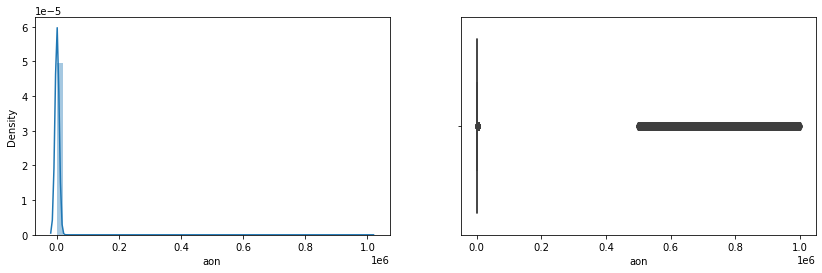

In [43]:
plt.figure(figsize=(14,4))
ax=plt.subplot(1,2,1)
sns.distplot(new_df['aon'])
ax=plt.subplot(1,2,2)
sns.boxplot(new_df['aon'])
plt.show()

In [44]:
new_df[new_df['aon']>2440].aon.min()

500101.677956991

We could see that the very next value to 2440 is 500101. Actually the field 'aon' describes that age of the customer on the telecom in the number of days. If we conside these outlier values with number of days, then it is around 1370 years. This kind of data is not giving any sense on this field. We cannot imagine that customer uses the telcom network for past 1370 years or more than that. These data are not realistic.

In [45]:
new_df.loc[df['aon']>2440,'aon']=np.nan

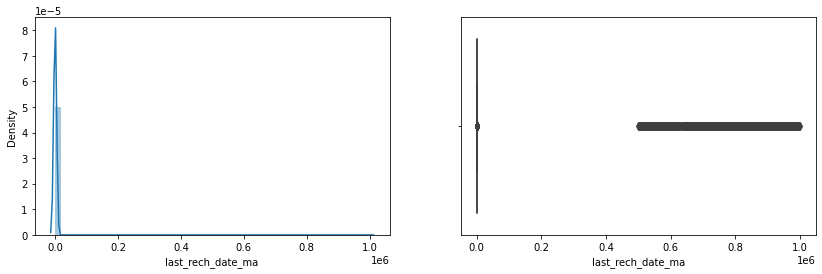

In [46]:
plt.figure(figsize=(14,4))
ax=plt.subplot(1,2,1)
sns.distplot(new_df['last_rech_date_ma'])
ax=plt.subplot(1,2,2)
sns.boxplot(new_df['last_rech_date_ma'])
plt.show()

In [47]:
new_df[new_df['last_rech_date_ma']>150].last_rech_date_ma.min()

500152.725726366

We could see that the very next value to 150 is 500152.The feature 'last_rech_date_ma' describes that the number of days till last recharge of main account. So if consider 500152 days, it means that around 1370 years. Its not make any sense. Hence will drop this values.

In [48]:
new_df.loc[new_df['last_rech_date_ma']>150,'last_rech_date_ma']=np.nan

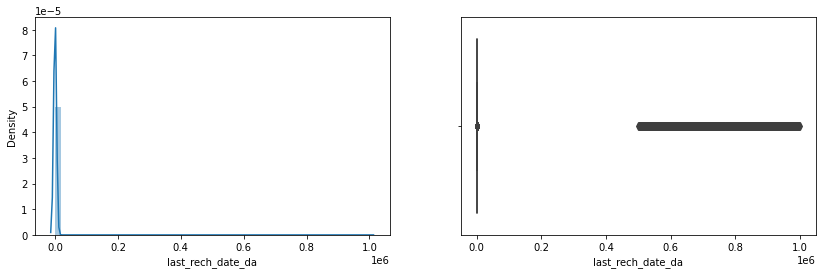

In [49]:
plt.figure(figsize=(14,4))
ax=plt.subplot(1,2,1)
sns.distplot(new_df['last_rech_date_da'])
ax=plt.subplot(1,2,2)
sns.boxplot(new_df['last_rech_date_da'])
plt.show()

In [50]:
new_df[new_df['last_rech_date_da']>120].last_rech_date_da.min()

500032.630399801

In [51]:
new_df.loc[new_df['last_rech_date_da']>120,'last_rech_date_da']=np.nan

We could see that the very next value to 150 is 500152.The feature 'last_rech_date_da' describes that the number of days till last recharge of data account. So if consider 500152 days, it means that around 1370 years. Its not make any sense. Hence will drop this values.

In [52]:
new_df.dropna(inplace=True)

In [53]:
new_df.isna().sum()

label                   0
aon                     0
daily_decr90            0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback90               0
conv_date               0
conv_month              0
dtype: int64

In [54]:
new_df.shape

(202598, 21)

In [55]:
new_df.describe()

label            aon   daily_decr90       rental90  \
count  202598.000000  202598.000000  202598.000000  202598.000000   
mean        0.875927     660.101985    6165.541537    3518.554764   
std         0.329666     497.724432   10962.900162    5792.728363   
min         0.000000       1.000000     -93.012667  -24720.580000   
25%         1.000000     248.000000      45.268750     313.200000   
50%         1.000000     525.000000    1580.000000    1363.385000   
75%         1.000000     967.000000    7955.723333    4252.572500   
max         1.000000    2440.000000  320630.000000  200148.110000   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech90  \
count      202598.000000      202598.000000     202598.000000  202598.000000   
mean            6.177193           0.947275       2069.176833       6.375606   
std             9.386436           7.090057       2371.935943       7.214527   
min             0.000000           0.000000          0.000000       0.000000   
25%             1.000000           0.000000        770.000000       2.000000   
50%             3.000000           0.000000       1539.000000       4.000000   
75%             7.000000           0.000000       2309.000000       9.000000   
max           113.000000         115.000000      55000.000000     336.000000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  202598.000000      202598.000000         202598.000000   
mean        7.646388       12519.207426           1867.770866   
std        12.447503       16921.716879           2081.004061   
min         0.000000           0.000000              0.000000   
25%         0.000000        2320.000000            773.000000   
50%         2.000000        7405.000000           1539.000000   
75%         8.000000       16171.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech90   fr_da_rech90    cnt_loans90  \
count         202598.000000  202598.000000  202598.000000  202598.000000   
mean              91.880195       0.041985       0.045963      18.567705   
std              366.863810       0.401093       0.952636     225.071083   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.800000       0.000000       0.000000       1.000000   
50%               36.000000       0.000000       0.000000       2.000000   
75%               79.500000       0.000000       0.000000       5.000000   
max            41456.500000      38.000000      64.000000    4997.517944   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90      payback90  \
count  202598.000000    202598.000000       202598.000000  202598.000000   
mean       23.883375         6.713433            0.045650       4.364923   
std        26.562672         2.116664            0.199663      10.327320   
min         0.000000         0.000000            0.000000       0.000000   
25%         6.000000         6.000000            0.000000       0.000000   
50%        12.000000         6.000000            0.000000       1.750000   
75%        30.000000         6.000000            0.000000       4.500000   
max       438.000000        12.000000            3.000000     171.500000   

           conv_date     conv_month  
count  202598.000000  202598.000000  
mean       14.452675       6.806967  
std         8.438004       0.741242  
min         1.000000       6.000000  
25%         7.000000       6.000000  
50%        14.000000       7.000000  
75%        21.000000       7.000000  
max        31.000000       8.000000

In [56]:
df[df['cnt_loans30']==0.0].payback90.sort_values()

107070      0.0
131628      0.0
131977      0.0
132203      0.0
132278      0.0
          ...  
206754    151.5
154738    159.5
113766    164.5
87920     165.0
110122    165.0
Name: payback90, Length: 3259, dtype: float64

In [57]:
df[df['cnt_loans90']==0.0].payback90.sort_values()

127         0.0
141219      0.0
141145      0.0
141017      0.0
140846      0.0
          ...  
105386    117.0
206754    151.5
113766    164.5
87920     165.0
110122    165.0
Name: payback90, Length: 2036, dtype: float64

    we can also see the customers with no loan history having their payback time as some data. It is not make sence that cutomer did not get the loan and they have paid it back. So we will delete these data.

In [58]:
new_df.loc[new_df['cnt_loans90']==0.0,'cnt_loans90']=np.nan

In [59]:
new_df.dropna(inplace=True)

In [60]:
new_df.shape

(200611, 21)

In [86]:
new_df['maxamnt_loans90'].value_counts()

6     174520
12     26084
0          7
Name: maxamnt_loans90, dtype: int64

### Data loss

In [61]:
data_loss=((209593-new_df.shape[0])/209593)*100
data_loss

4.285448464404823

##### After all the clean up process, we lost around 4.3% of data, which is acceptable range.

### Checking outliers

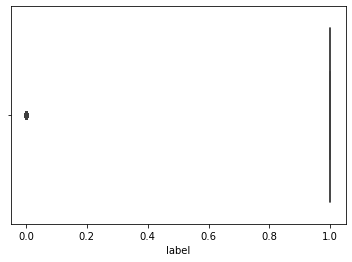

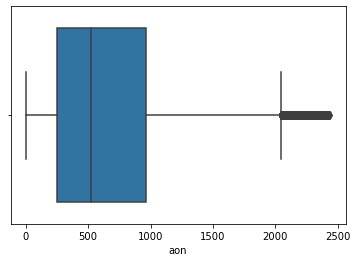

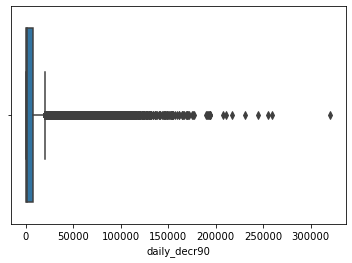

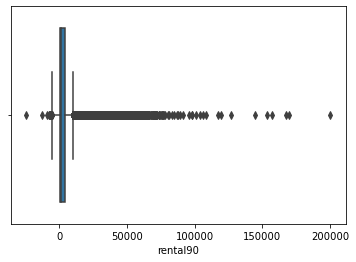

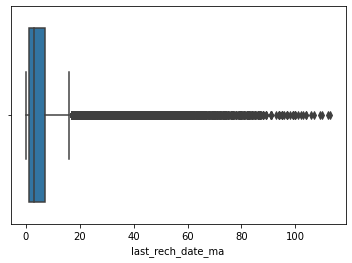

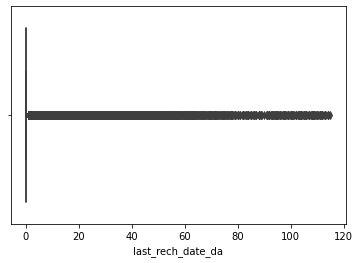

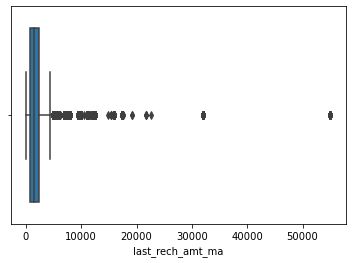

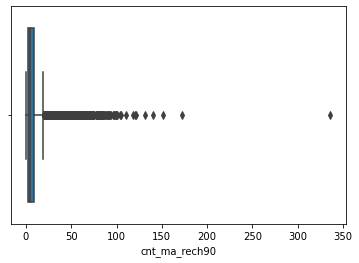

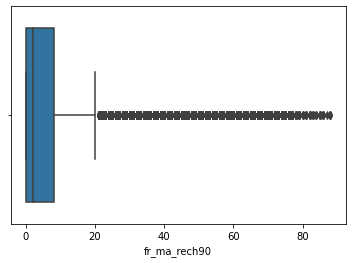

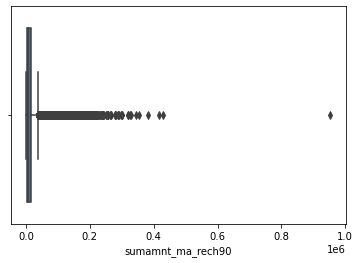

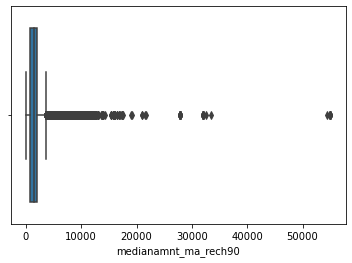

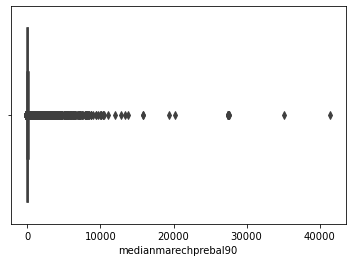

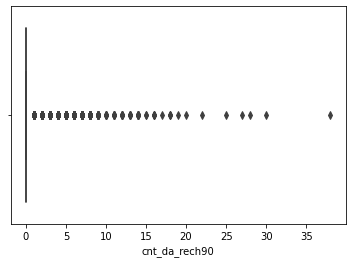

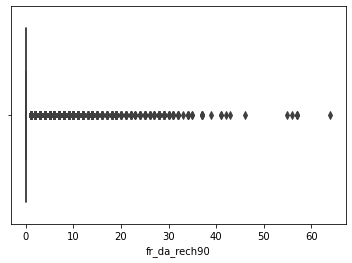

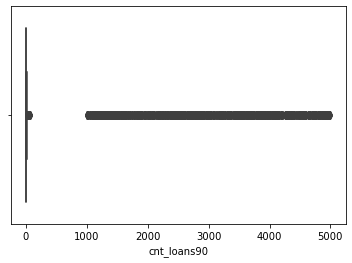

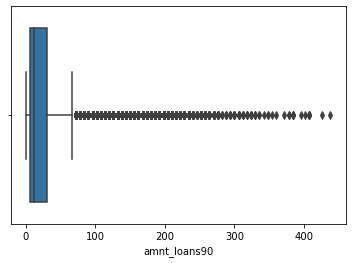

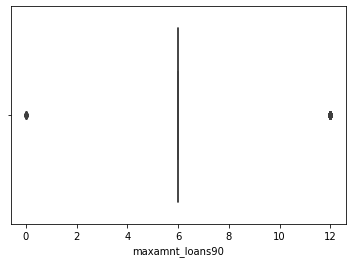

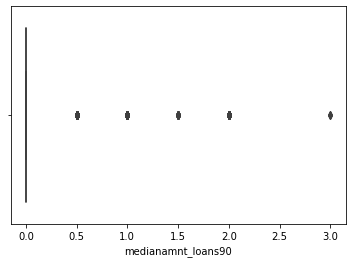

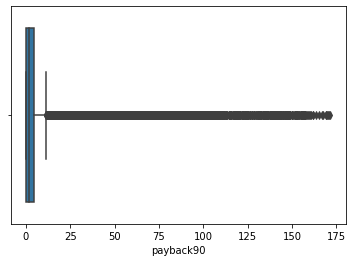

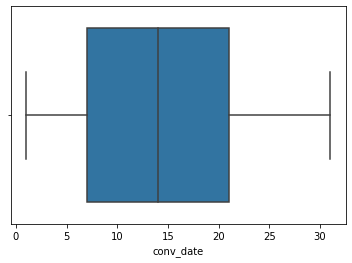

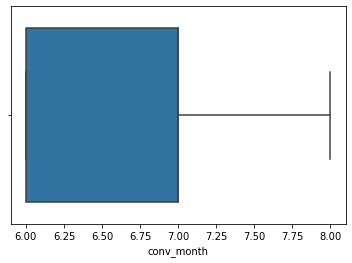

In [62]:
for col in new_df.columns:
    sns.boxplot(new_df[col])
    plt.show()

    From the above plots we can see that we have lot of outliers with many of the features. We will lost most of the data if we try to clean the outliers. But as we know our data is very expensive, we cannot afford for such a big data loss. So I am not going to remove the outliers. Instead we will try to normalize the data by applying transformations to remove the data skewness.

### Checking multi-collinearity using heat map

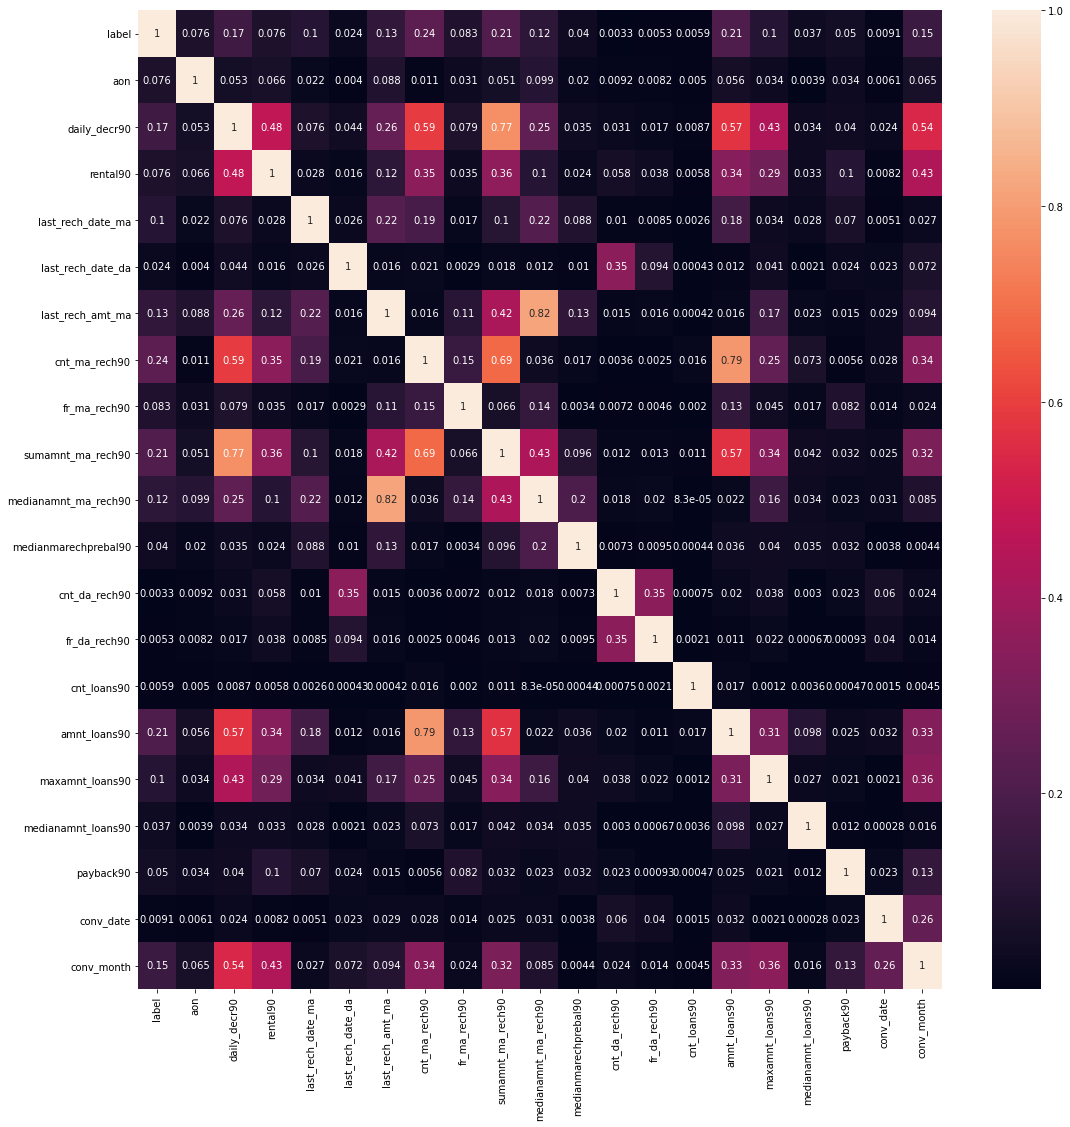

In [63]:
plt.figure(figsize=(18,18))
sns.heatmap(new_df.corr().abs(),annot=True)
plt.show()

     We could not see any feature which has strong relation with target label. Also there is no much strong relation with in any features.We will handle the multi-collinearity problem using VIF.

### Removing data skewness

In [64]:
new_df.skew().sort_values()

label                   -2.263633
conv_date                0.175946
conv_month               0.339829
aon                      0.951708
maxamnt_loans90          2.197819
fr_ma_rech90             2.296106
amnt_loans90             3.125954
cnt_ma_rech90            3.405755
last_rech_date_ma        3.579618
medianamnt_ma_rech90     3.742913
last_rech_amt_ma         3.802818
daily_decr90             4.246753
rental90                 4.338265
medianamnt_loans90       4.905899
sumamnt_ma_rech90        4.921723
payback90                6.843135
last_rech_date_da        9.619367
cnt_loans90             16.504500
cnt_da_rech90           27.078340
fr_da_rech90            28.874405
medianmarechprebal90    45.622493
dtype: float64

In [65]:
skewed_features=new_df.drop(['label','conv_date','conv_month'],axis=1).columns

In [66]:
new_df1=new_df.copy()

In [67]:
new_df1[skewed_features]=np.cbrt(new_df1[skewed_features])
print(new_df1.skew().sort_values())

label                   -2.263633
medianamnt_ma_rech90    -0.518875
last_rech_amt_ma        -0.411380
cnt_ma_rech90           -0.356362
sumamnt_ma_rech90       -0.033965
aon                      0.105108
rental90                 0.159011
conv_date                0.175946
last_rech_date_ma        0.280920
conv_month               0.339829
fr_ma_rech90             0.356670
medianmarechprebal90     0.465897
payback90                0.596505
daily_decr90             0.598919
amnt_loans90             1.056265
maxamnt_loans90          2.128030
medianamnt_loans90       3.884703
last_rech_date_da        6.412388
cnt_da_rech90            6.628000
cnt_loans90             10.672748
fr_da_rech90            17.352905
dtype: float64


We reomved the skewness as much as possible by applying cube root.

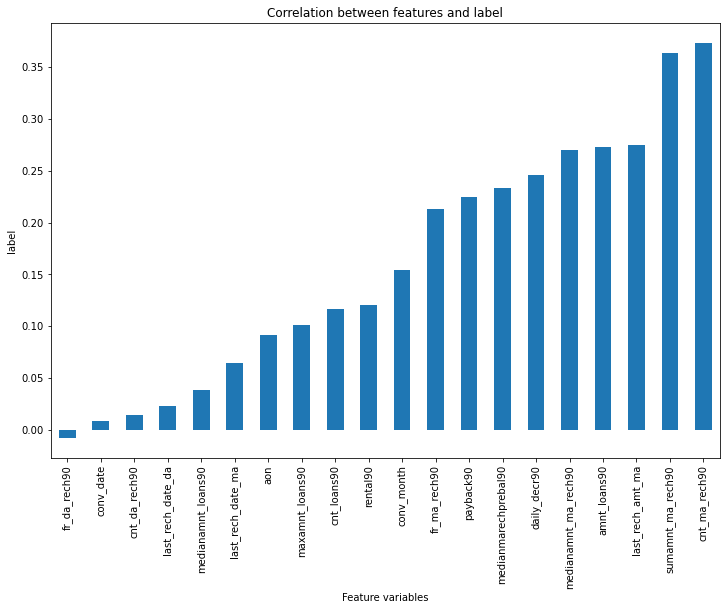

In [68]:
plt.figure(figsize=(12,8))
new_df1.corr()['label'].sort_values().drop(['label']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('label')
plt.xticks(rotation=90)
plt.title('Correlation between features and label')
plt.show()

In [69]:
X=new_df1.drop(['label'],axis=1)
y=new_df1['label']

In [70]:
from sklearn.preprocessing import StandardScaler
X_sc=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

### Removing multi-collinearity problem using VIF 

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

VIF values              Features
8    16.236928     sumamnt_ma_rech90
9     8.935740  medianamnt_ma_rech90
6     8.602266         cnt_ma_rech90
1     7.375805          daily_decr90
5     6.973003      last_rech_amt_ma
11    5.661377         cnt_da_rech90
4     4.644933     last_rech_date_da
19    4.197130            conv_month
14    3.792338          amnt_loans90
3     2.017266     last_rech_date_ma
2     1.715705              rental90
17    1.612972             payback90
12    1.506618          fr_da_rech90
10    1.448069  medianmarechprebal90
15    1.351197       maxamnt_loans90
7     1.265540          fr_ma_rech90
13    1.227239           cnt_loans90
18    1.207448             conv_date
0     1.032482                   aon
16    1.023483    medianamnt_loans90

In [73]:
X_sc.drop(['sumamnt_ma_rech90'],axis=1,inplace=True)

In [74]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

VIF values              Features
8     6.892169  medianamnt_ma_rech90
5     6.786679      last_rech_amt_ma
1     5.939050          daily_decr90
10    5.660161         cnt_da_rech90
4     4.644644     last_rech_date_da
18    3.900842            conv_month
6     3.889410         cnt_ma_rech90
13    3.755054          amnt_loans90
2     1.715145              rental90
3     1.701998     last_rech_date_ma
16    1.559764             payback90
11    1.506595          fr_da_rech90
9     1.448065  medianmarechprebal90
14    1.342489       maxamnt_loans90
7     1.265524          fr_ma_rech90
12    1.227216           cnt_loans90
17    1.204047             conv_date
0     1.032087                   aon
15    1.023261    medianamnt_loans90

#### We removed multi-collinearity problem in our data set.

## Model Building

#### Applying stadandard scalar to the input features

In [75]:
X_sc=StandardScaler().fit_transform(X_sc)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,plot_roc_curve

In [77]:
y.value_counts()

1    175474
0     25137
Name: label, dtype: int64

#### Finding best random state for train test data split

In [78]:
m_acc=0
b_rs=0
for i in range(1,100):
    lr=LogisticRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(acc>m_acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)

Best Accuracy:  0.8866867385799454 Best RS:  95


In [79]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=95)

In [80]:
y_train.value_counts()

1    131479
0     18979
Name: label, dtype: int64

### SMOTE Oversampling

As we have imbalanced data in out dataset, we will apply SMOTE resampling technique on our training data.

In [81]:
from imblearn.over_sampling import SMOTE
X_train_res,y_train_res=SMOTE().fit_resample(X_train,y_train)
print("Training set size before applying SMOTE: ",X_train.shape,y_train.shape)
print("Training set size after applying SMOTE:",X_train_res.shape,y_train_res.shape)

Training set size before applying SMOTE:  (150458, 19) (150458,)
Training set size after applying SMOTE: (262958, 19) (262958,)


## Building base models - model selection

In [82]:
lr=LogisticRegression()
rf_clf=RandomForestClassifier()
gb_clf=GradientBoostingClassifier()
dt_clf=DecisionTreeClassifier()
ab_clf=AdaBoostClassifier()
knn_clf=KNeighborsClassifier()

In [83]:
models=[lr,rf_clf,gb_clf,dt_clf,ab_clf,knn_clf]

In [84]:
for m in models:
    m.fit(X_train_res,y_train_res)
    y_pred=m.predict(X_test)
    print("Metrics for ",m)
    print("Accuracy score: ",accuracy_score(y_test,y_pred))
    print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
    print("Classsification Report: \n",classification_report(y_test,y_pred),'\n')

Metrics for  LogisticRegression()
Accuracy score:  0.7733734771598907
ROC AUC Score:  0.7675472677093094
Confusion Matrix: 
 [[ 4679  1479]
 [ 9887 34108]]
Classsification Report: 
               precision    recall  f1-score   support

           0       0.32      0.76      0.45      6158
           1       0.96      0.78      0.86     43995

    accuracy                           0.77     50153
   macro avg       0.64      0.77      0.65     50153
weighted avg       0.88      0.77      0.81     50153
 

Metrics for  RandomForestClassifier()
Accuracy score:  0.915817598149662
ROC AUC Score:  0.7865195456642173
Confusion Matrix: 
 [[ 3788  2370]
 [ 1852 42143]]
Classsification Report: 
               precision    recall  f1-score   support

           0       0.67      0.62      0.64      6158
           1       0.95      0.96      0.95     43995

    accuracy                           0.92     50153
   macro avg       0.81      0.79      0.80     50153
weighted avg       0.91      0.9

## Cross validation 

In [88]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for m in models:
    print("For Model ",m)
    mean_acc=0
    for fold, (train_index, test_index) in enumerate(kf.split(X_sc,y), 1):
        X_train = X_sc[train_index]
        y_train = np.ravel(y)[train_index]
        X_test = X_sc[test_index]
        y_test = np.ravel(y)[test_index]
        sm = SMOTE(random_state=12)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)       
        m.fit(X_train_oversampled, y_train_oversampled )  
        y_pred = m.predict(X_test)
        acc=accuracy_score(y_test,y_pred)
        mean_acc=mean_acc+acc
    print("Mean Accuracy: ",(mean_acc/5))

For Model  LogisticRegression()
Mean Accuracy:  0.7695689726972268
For Model  RandomForestClassifier()
Mean Accuracy:  0.9146258220430579
For Model  GradientBoostingClassifier()
Mean Accuracy:  0.8756847993998635
For Model  DecisionTreeClassifier()
Mean Accuracy:  0.8769010693393922
For Model  AdaBoostClassifier()
Mean Accuracy:  0.8298198932306386
For Model  KNeighborsClassifier()
Mean Accuracy:  0.8090682950187382


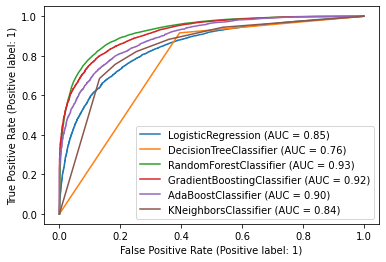

In [220]:
display=plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(dt_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(rf_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(gb_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(ab_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(knn_clf,X_test,y_test,ax=display.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

### Conclusion 

    Based on the base model score, cross validtion score and auc score, RandomForestClassifier works well for our data set.Hence we will choose RandomForestClassifier as our final model for this project.

### Final Model - RandomForestClassifier

## Hyper parameter tuning

In [221]:
from sklearn.model_selection import GridSearchCV

In [224]:
param={'criterion':['gini','entropy'],       
       'max_features':['auto', 'sqrt', 'log2'],
      'n_estimators':[100,130]}
grd_srch=GridSearchCV(RandomForestClassifier(),param_grid=param,n_jobs=-1)
grd_srch.fit(X_train_res,y_train_res)
print(grd_srch.best_estimator_)
print(grd_srch.best_score_)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=130)
0.9522815013786033


### Finding best random state for the model

In [229]:
m_acc=0
b_rs=0
for i in range(1,20):
    final_model=RandomForestClassifier(criterion='entropy', max_features='log2',n_estimators=130,random_state=i,n_jobs=-1)
    final_model.fit(X_train_res,y_train_res)
    y_pred=final_model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)
final_model=RandomForestClassifier(criterion='entropy', max_features='log2',n_estimators=130,random_state=b_rs,n_jobs=-1)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print("Test Accuracy score: " ,accuracy_score(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))                     
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classifiction Report:\n",classification_report(y_test,y_pred))

Best Accuracy:  0.9801605104431484 Best RS:  5
Test Accuracy score:  0.9801605104431484
ROC AUC Score:  0.9499074881141213
Confusion Matrix: 
 [[ 4626   461]
 [  335 34700]]
Classifiction Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      5087
           1       0.99      0.99      0.99     35035

    accuracy                           0.98     40122
   macro avg       0.96      0.95      0.95     40122
weighted avg       0.98      0.98      0.98     40122



In [89]:
final_model=RandomForestClassifier(criterion='entropy', max_features='log2',n_estimators=130,random_state=5,n_jobs=-1)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print("Test Accuracy score: " ,accuracy_score(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))                     
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classifiction Report:\n",classification_report(y_test,y_pred))

Test Accuracy score:  0.9796620308060415
ROC AUC Score:  0.9494540226265352
Confusion Matrix: 
 [[ 4624   463]
 [  353 34682]]
Classifiction Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      5087
           1       0.99      0.99      0.99     35035

    accuracy                           0.98     40122
   macro avg       0.96      0.95      0.95     40122
weighted avg       0.98      0.98      0.98     40122



Text(0.5, 1.0, 'ROC AUC Curve for final model')

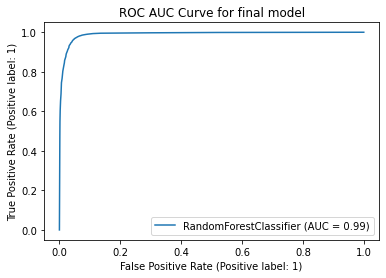

In [95]:
plot_roc_curve(final_model,X_test,y_test)
plt.title("ROC AUC Curve for final model")

### After hyper parameter tuning we able to build the final model with 98% of accuracy score and 99% of AUC score.

### Model Saving

In [91]:
import pickle

In [92]:
pickle.dump(final_model,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/MicroCreditDefaulter.pkl','wb'))

In [93]:
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/MicroCreditDefaulter.pkl','rb'))

In [94]:
prediction=final_model.predict(X_test)
result_table=pd.DataFrame({'Actual':y_test,'Predicted':prediction})
pd.DataFrame([final_model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0      1      2      3      4      5      6      7      8      \
Predicted      1      1      1      1      1      1      0      1      1   
Actual         1      1      1      1      1      1      0      0      1   

           9      10     11     12     13     14     15     16     17     \
Predicted      1      1      0      1      1      1      1      1      1   
Actual         1      1      0      1      1      1      1      1      1   

           18     19     20     21     22     23     24     25     26     \
Predicted      1      1      1      1      1      1      1      1      1   
Actual         1      1      1      1      1      1      1      1      1   

           27     28     29     30     31     32     33     34     35     \
Predicted      1      1      1      0      1      1      1      1      1   
Actual         1      1      1      0      1      1      1      1      1   

           36     37     38     39     40     41     42     43     44     \
Predicted      1      0      1      1      1      1      1      1      1   
Actual         1      0      1      1      1      1      1      1      1   

           45     46     47     48     49     50     51     52     53     \
Predicted      0      1      1      1      1      1      1      1      1   
Actual         0      1      1      1      1      1      1      1      0   

           54     55     56     57     58     59     60     61     62     \
Predicted      1      1      1      1      1      1      1      1      1   
Actual         1      1      1      1      1      1      1      1      1   

           63     64     65     66     67     68     69     70     71     \
Predicted      1      1      1      1      1      1      1      1      1   
Actual         1      1      0      1      1      1      1      1      1   

           72     73     74     75     76     77     78     79     80     \
Predicted      1      1      1      1      1      1      1      1      0   
Actual         1      1      1      1      1      1      1      1      0   

           81     82     83     84     85     86     87     88     89     \
Predicted      1      1      0      1      1      1      1      1      1   
Actual         1      1      0      1      1      1      1      0      1   

           90     91     92     93     94     95     96     97     98     \
Predicted      1      1      1      1      1      1      1      1      1   
Actual         1      1      1      1      1      1      1      1      1   

           99     100    101    102    103    104    105    106    107    \
Predicted      1      0      1      1      1      1      1      1      1   
Actual         1      0      1      1      1      1      1      1      1   

           108    109    110    111    112    113    114    115    116    \
Predicted      1      1      1      1      1      1      1      1      1   
Actual         1      1      1      1      1      1      1      1      1   

           117    118    119    120    121    122    123    124    125    \
Predicted      1      1      1      0      1      0      1      1      1   
Actual         1      1      1      0      1      0      1      1      1   

           126    127    128    129    130    131    132    133    134    \
Predicted      1      1      1      1      1      0      1      1      1   
Actual         1      1      1      1      1      0      1      1      1   

           135    136    137    138    139    140    141    142    143    \
Predicted      0      1      1      1      1      1      1      1      1   
Actual         0      1      1      1      1      1      1      1      1   

           144    145    146    147    148    149    150    151    152    \
Predicted      1      1      1      1      1      1      1      1      1   
Actual         1      1      1      1      1      1      1      1      1   

           153    154    155    156    157    158    159    160    161    \
Predicted      1      0      1      1     